In [1]:
import numpy as np

from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

from ipywidgets import interact, IntSlider

# Data prepration

In [2]:
moons = datasets.make_moons()
moons_x, moons_y = moons

In [3]:
moons_x = moons_x + np.random.random(moons_x.shape)/5

In [4]:
poly_features = PolynomialFeatures(degree=3).fit_transform(moons_x)[:, 1:]
scaled = StandardScaler().fit_transform(poly_features)

In [5]:
X, y = scaled, moons_y

<AxesSubplot:>

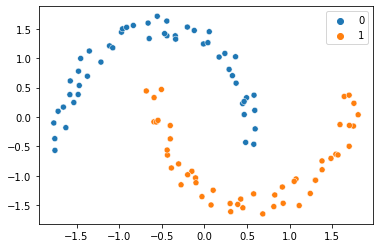

In [6]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Training & testing

In [8]:
classifier = LinearSVC(C=10, loss='hinge')

In [9]:
classifier.fit(X_train, y_train)

C:\Users\DELL\.conda\envs\test\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=10, loss='hinge')

In [10]:
classifier.score(X_test, y_test)

1.0

# Plotting decision boundries

In [11]:
xx, yy = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))

In [12]:
xxyy = np.column_stack((xx.ravel(), yy.ravel()))
xxyy = PolynomialFeatures(degree=3).fit_transform(xxyy)[:, 1:]
xxyy = StandardScaler().fit_transform(xxyy)

In [13]:
z = classifier.predict(xxyy).reshape(xx.shape)

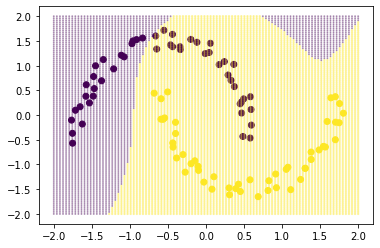

In [14]:
plt.scatter(x=X[:, 0], y=X[:, 1], c=y)
plt.scatter(xx, yy, z+1, c=z+1, alpha=0.35)